# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# models
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# scaffolding
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, roc_curve
from sklearn.metrics import accuracy_score, roc_auc_score, ConfusionMatrixDisplay
import time

from sklearn import set_config
set_config(display="diagram")

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('sample_data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Data

---


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [28]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Observations on the data:

- The dataset is complete, with no missing or null values.
- It includes 10 categorical variables and 10 numerical variables.
- Among the categorical features, three are binary: 'default', 'housing', and 'loan'.
- The variable 'duration', as noted in the description, isn’t useful for predicting whether the product will be sold since it’s recorded after the sale. For this reason, we’ll consider dropping it.

**Explore the Distribution of the dataset**


['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


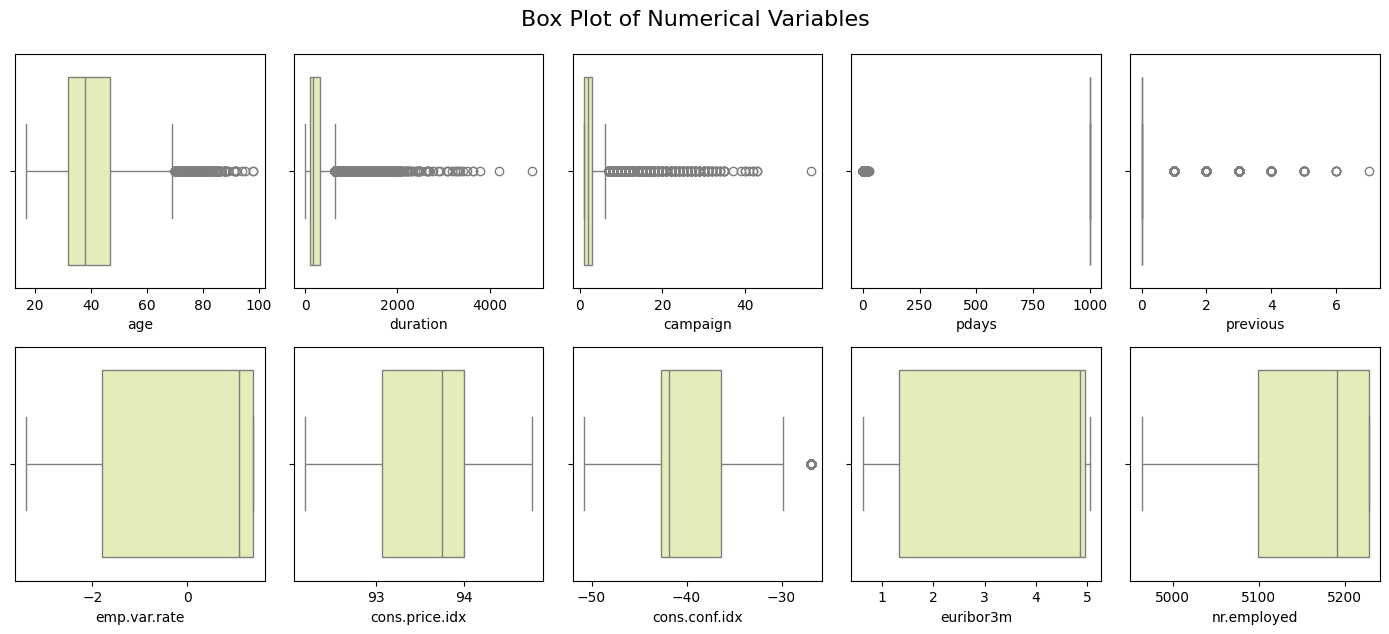

In [36]:
# Identify numerical columns
num_column_lst = []
for icol in df.columns:
    if df[icol].dtypes in ['float64', 'int64']:
        num_column_lst.append(icol)

# Print the numerical columns
print(num_column_lst)

# Set up the figure and axes for box plots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(14, 6))  # Adjusted the figure size for better readability

# Set the color palette to 'YlGnBu'
sns.set_palette('YlGnBu')

# Plot each numerical feature's box plot
for name, ax in zip(num_column_lst, axs.flatten()):
    sns.boxplot(data=df, x=name, ax=ax)

# Adjust layout for readability
fig.tight_layout()

# Set title for the overall plot
fig.suptitle('Box Plot of Numerical Variables', y=1.05, fontsize=16)

# Display the plot
plt.show()


The following insights were observed regarding the distribution of key variables:

- Duration: The data shows an uneven distribution, with the majority of calls being relatively short, while a few are significantly longer. This might indicate that, as clients are onboarded, calls tend to extend due to additional exchanges of information. This variable could potentially have a meaningful impact on our predictive model, so it's something to keep an eye on.
- Campaign: This variable represents the number of contact attempts during a specific campaign. As expected, the majority of responses occur early in the campaign, though there are some instances where additional outreach is needed.
- Pdays: Over 75% of the records have values greater than 999, with the rest being at 0. This suggests that pdays is only relevant for the most recent campaign and may not provide much value for future campaigns. I’m considering removing this variable.
- Previous: This tracks how many times a person was contacted before the current campaign. Since more than 75% of the records show zero prior contact, this variable seems to offer limited value and is also being considered for removal.l.

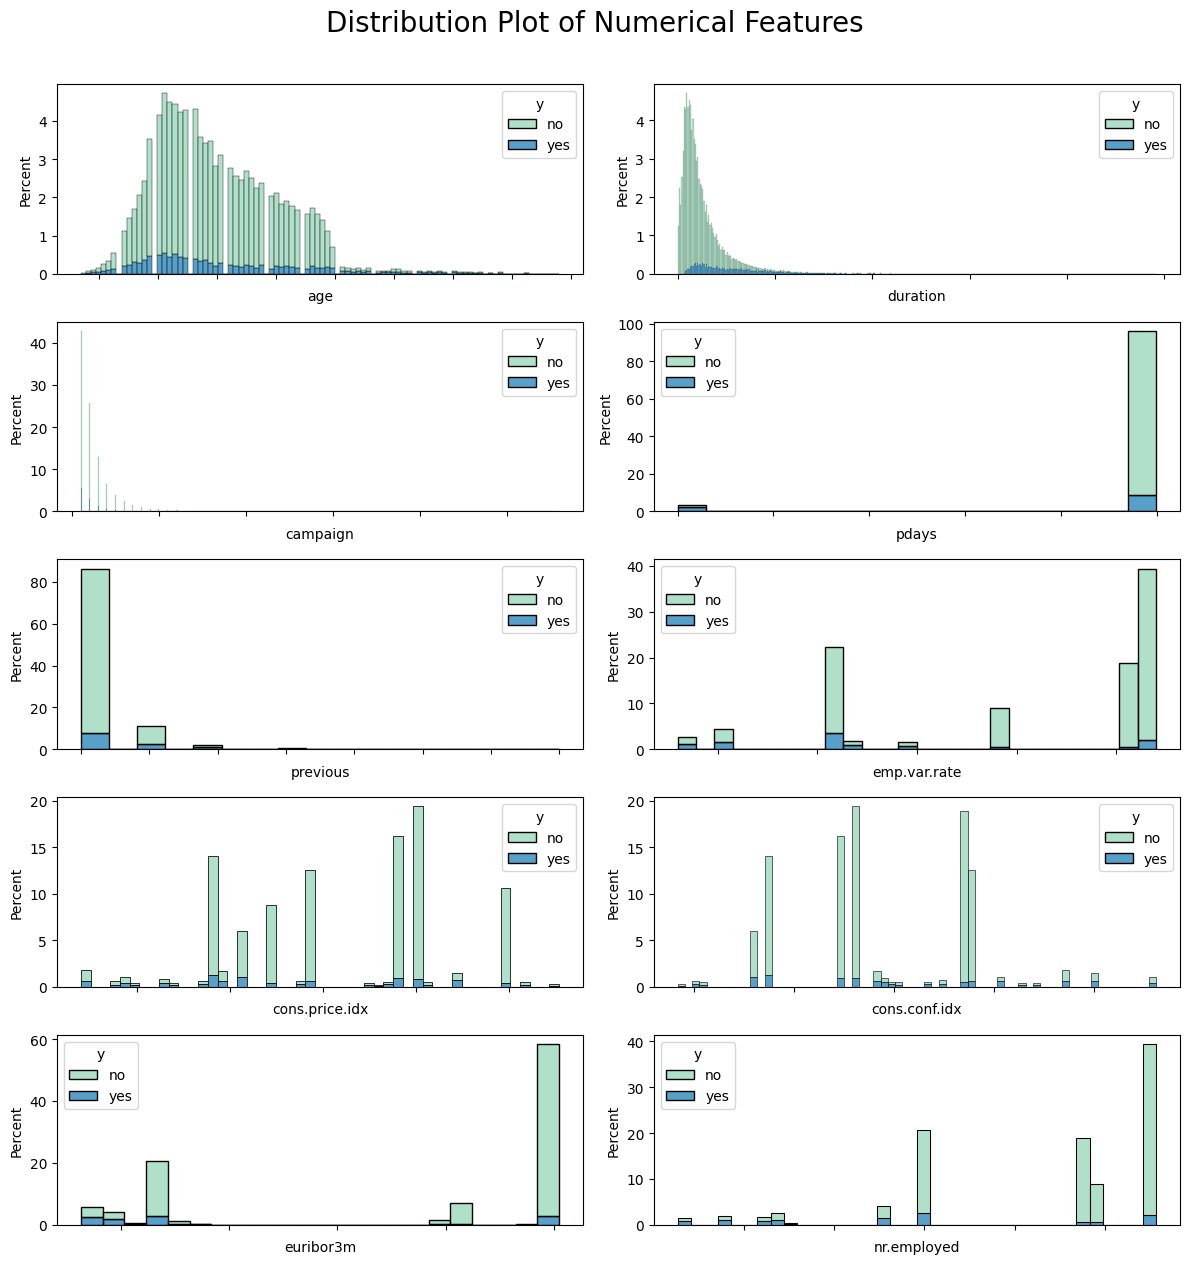

In [33]:
# Set up the figure and axes for distribution plots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 12))

# Plot distribution for each numerical feature with custom color palette
for name, ax in zip(num_column_lst, axs.flatten()):
    sns.histplot(data=df, x=name, ax=ax, hue='y', multiple='stack', stat='percent', palette='YlGnBu')
    ax.set_xticklabels(ax.get_xticklabels(minor=True, which='minor'), rotation=0, fontsize=10)  # Adjusted fontsize for readability

# Adjust layout for readability
fig.tight_layout()

# Set title for the overall plot
fig.suptitle('Distribution Plot of Numerical Features', y=1.05, fontsize=20)
plt.show()


Explore the distribution through bar plots

After reviewing the data, many features show skewed distributions that will need to be scaled for better analysis.

Upon closer examination of the 'pdays' feature, it appears to provide minimal significance and will likely be dropped. Additionally, the information about prior contacts is already captured by 'previous' or 'campaign', making this variable redundant.

Next, we’ll analyze the correlation between features.

Text(0.5, 1.0, 'Correlation Matrix of the numerical features')

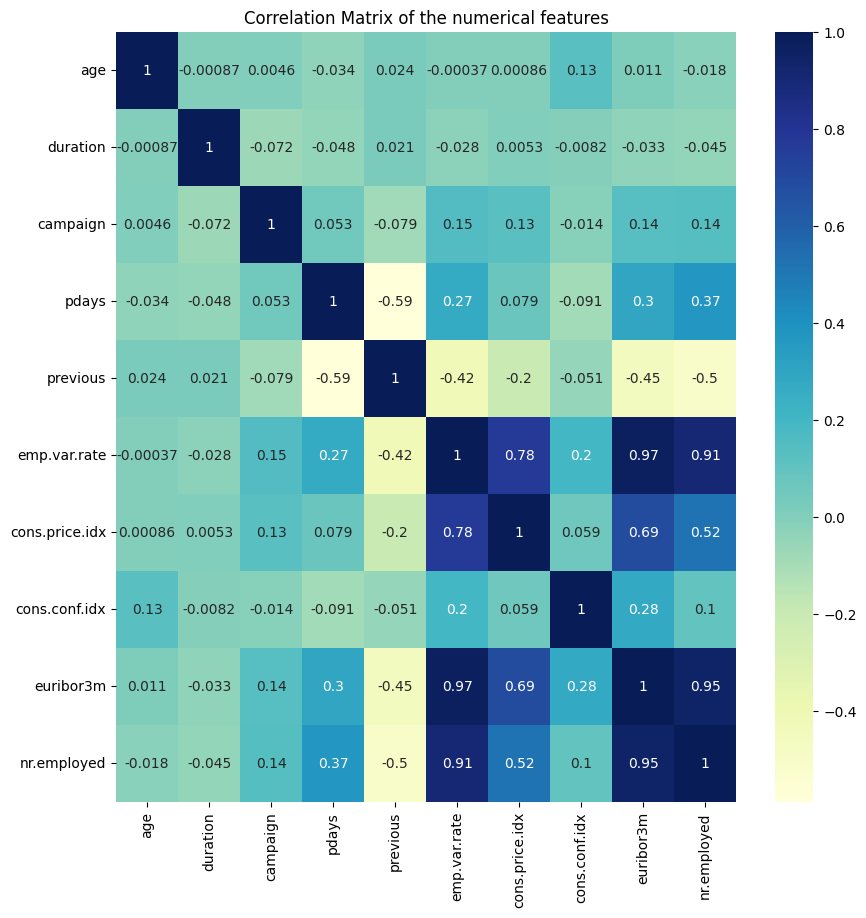

In [30]:
plt.figure(figsize=(10, 10))
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix of the numerical features')

<Figure size 2000x2000 with 0 Axes>

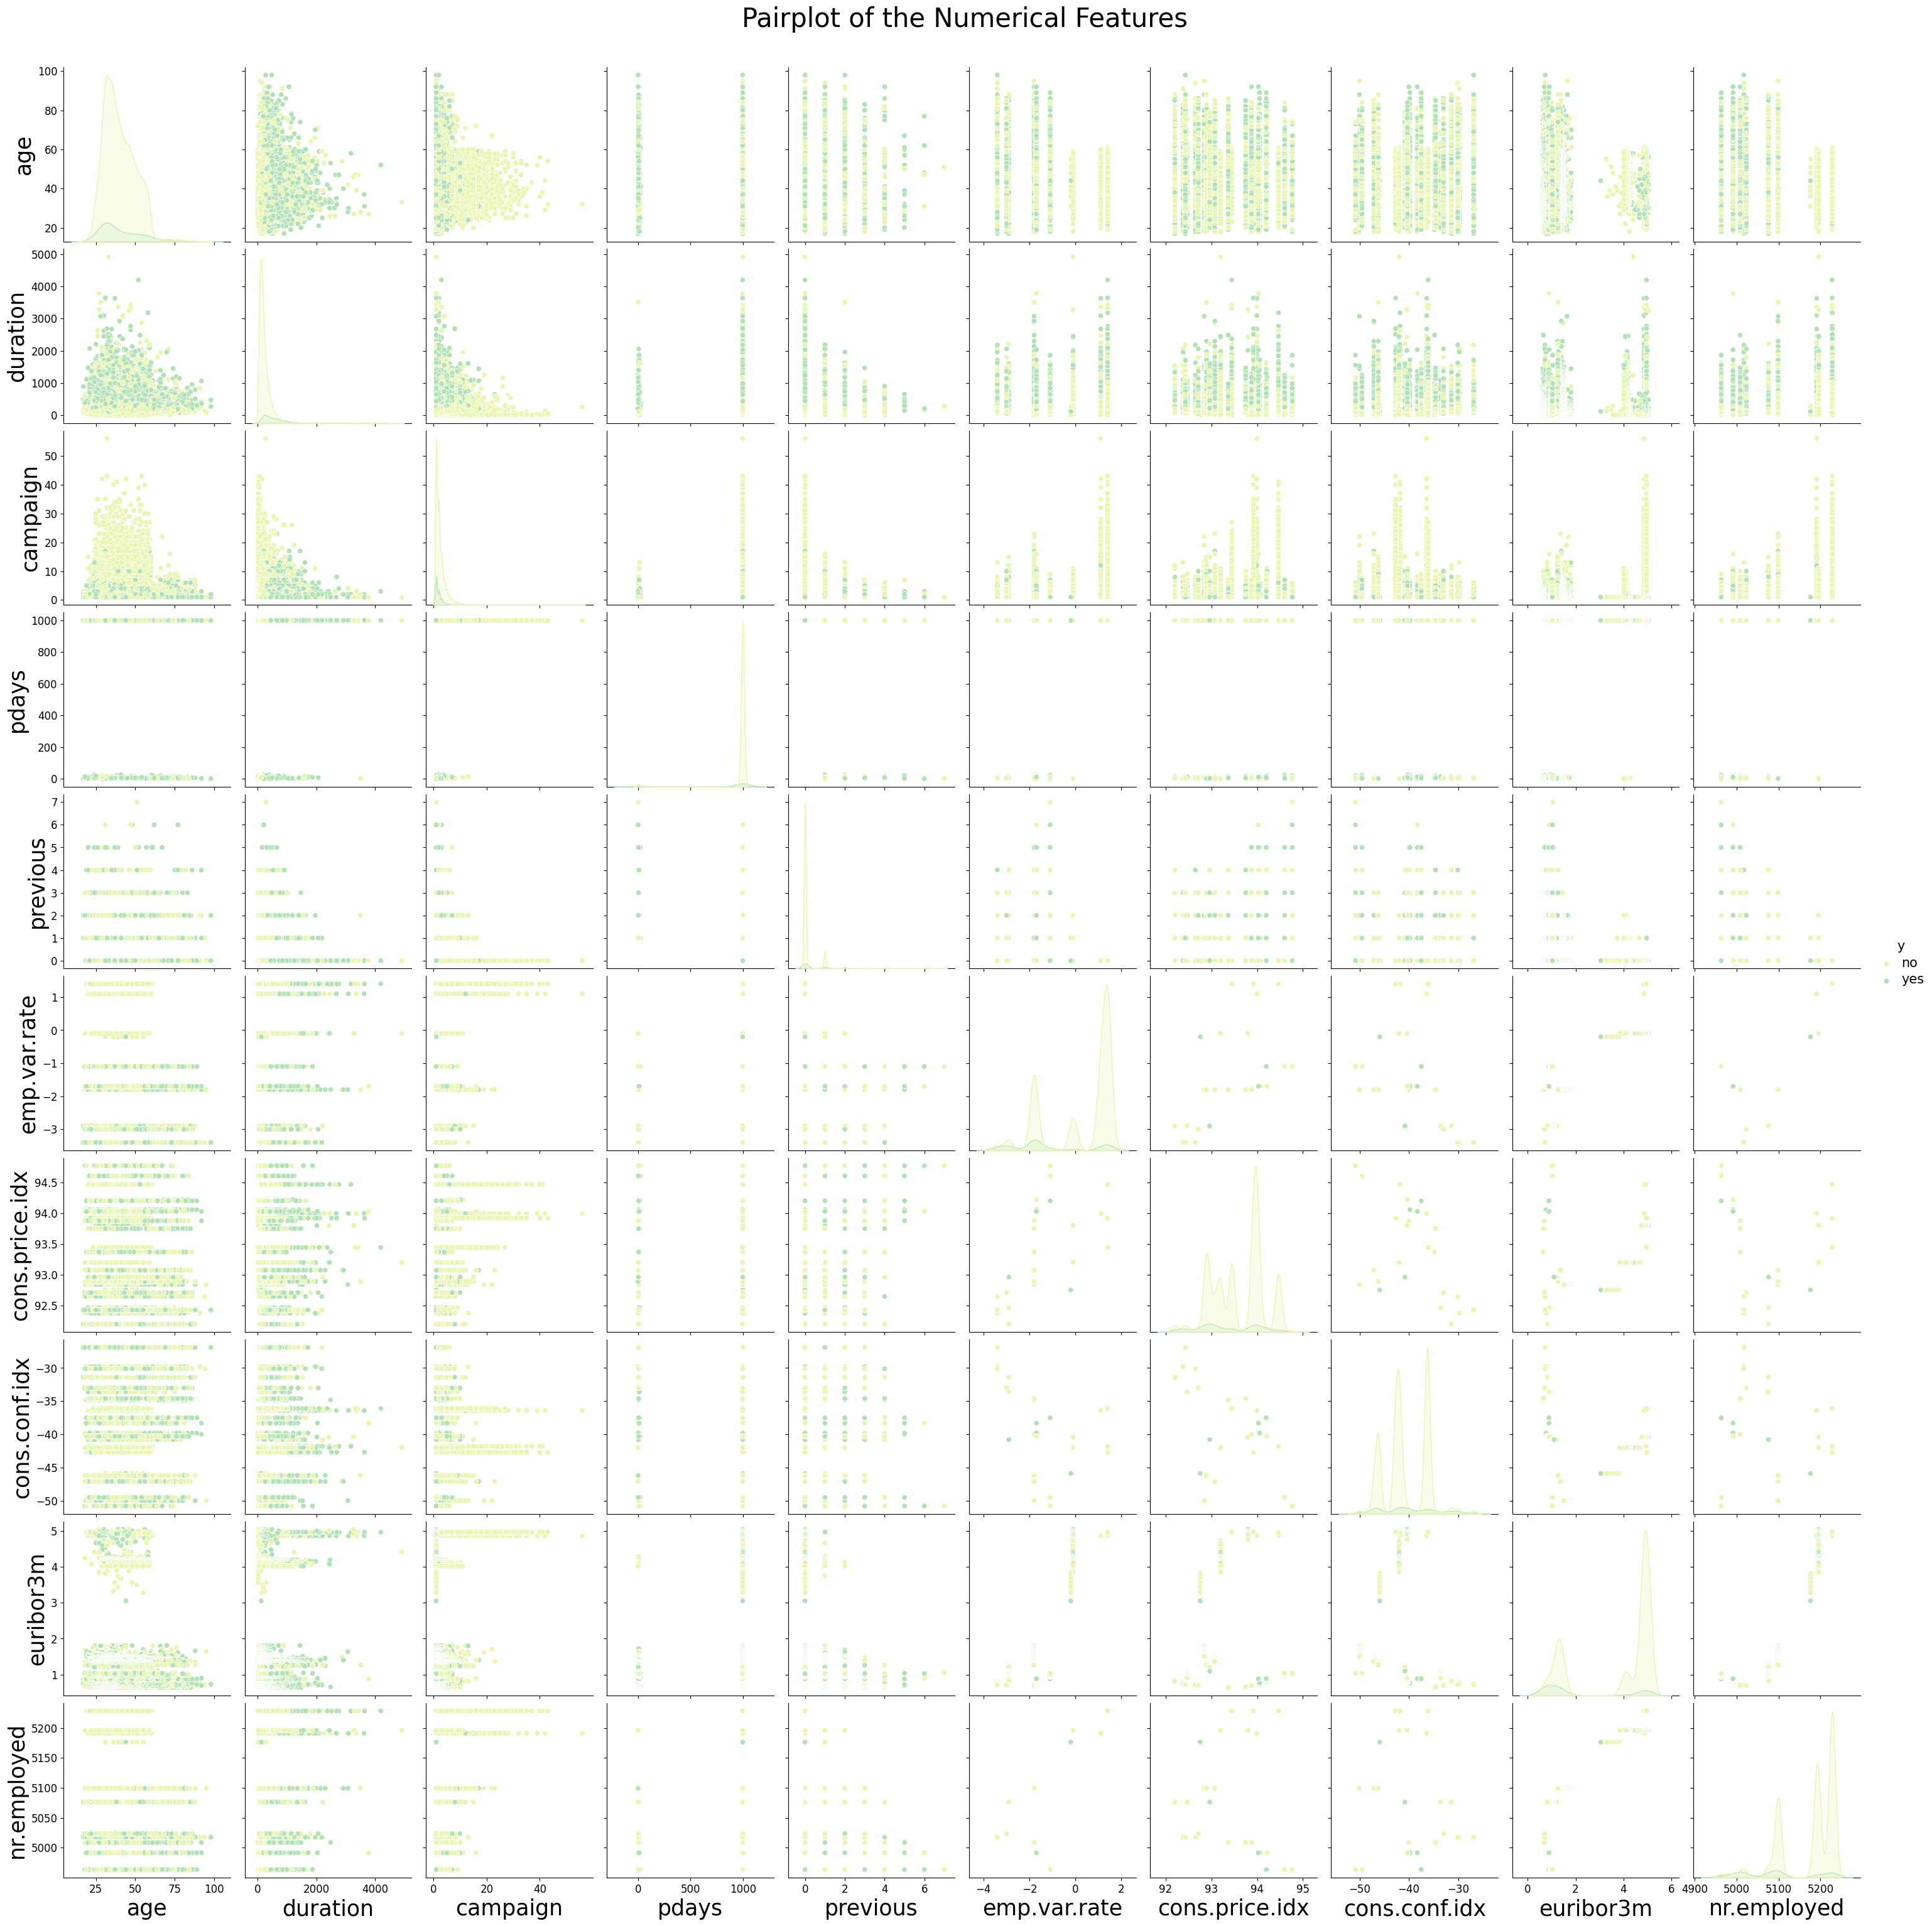

In [43]:
# Set the figure size for the pairplot
plt.figure(figsize=(20, 20))

# Generate the pairplot with the hue set to 'y'
pairplot = sns.pairplot(data=df, hue='y', height=3)

# Set the title for the pairplot
pairplot.fig.suptitle('Pairplot of the Numerical Features', y=1.02, fontsize=30)

# Customize font size for the legend, axes, and ticks
for ax in pairplot.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=25)
    ax.set_ylabel(ax.get_ylabel(), fontsize=25)
    ax.tick_params(axis='both', labelsize=12)

# Adjust legend font size
pairplot._legend.set_title('y')
for text in pairplot._legend.texts:
    text.set_fontsize(15)
pairplot._legend.get_title().set_fontsize(15)

# Display the plot
plt.show()

As observed, there is significant correlation between many macroeconomic variables.

For example, the correlation between 'nr.employed' and 'emp.var.rate' indicates redundancy, as one represents the quarter-over-quarter change of the other. Therefore, we’ll drop 'nr.employed'.

The relationship between 'euribor3m' and 'emp.var.rate' is less straightforward. An increase in average rates typically wouldn’t align with higher employment—it would more likely coincide with a decrease in employment. Similarly, this applies to 'cons.price.idx'. For now, we’ll retain these variables, as the observed correlations may reflect sampling bias tied to the economic cycle during data collection.

Conclusion for Numerical Features:

- Features considered for removal: 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'nr.employed', 'cons.price.idx', 'euribor3m'.
- Dropped: 'nr.employed', 'pdays'.
- Further exploration needed: Investigate the relationship between 'cons.price.idx' and the value of 'duration' in a predictive model.

Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


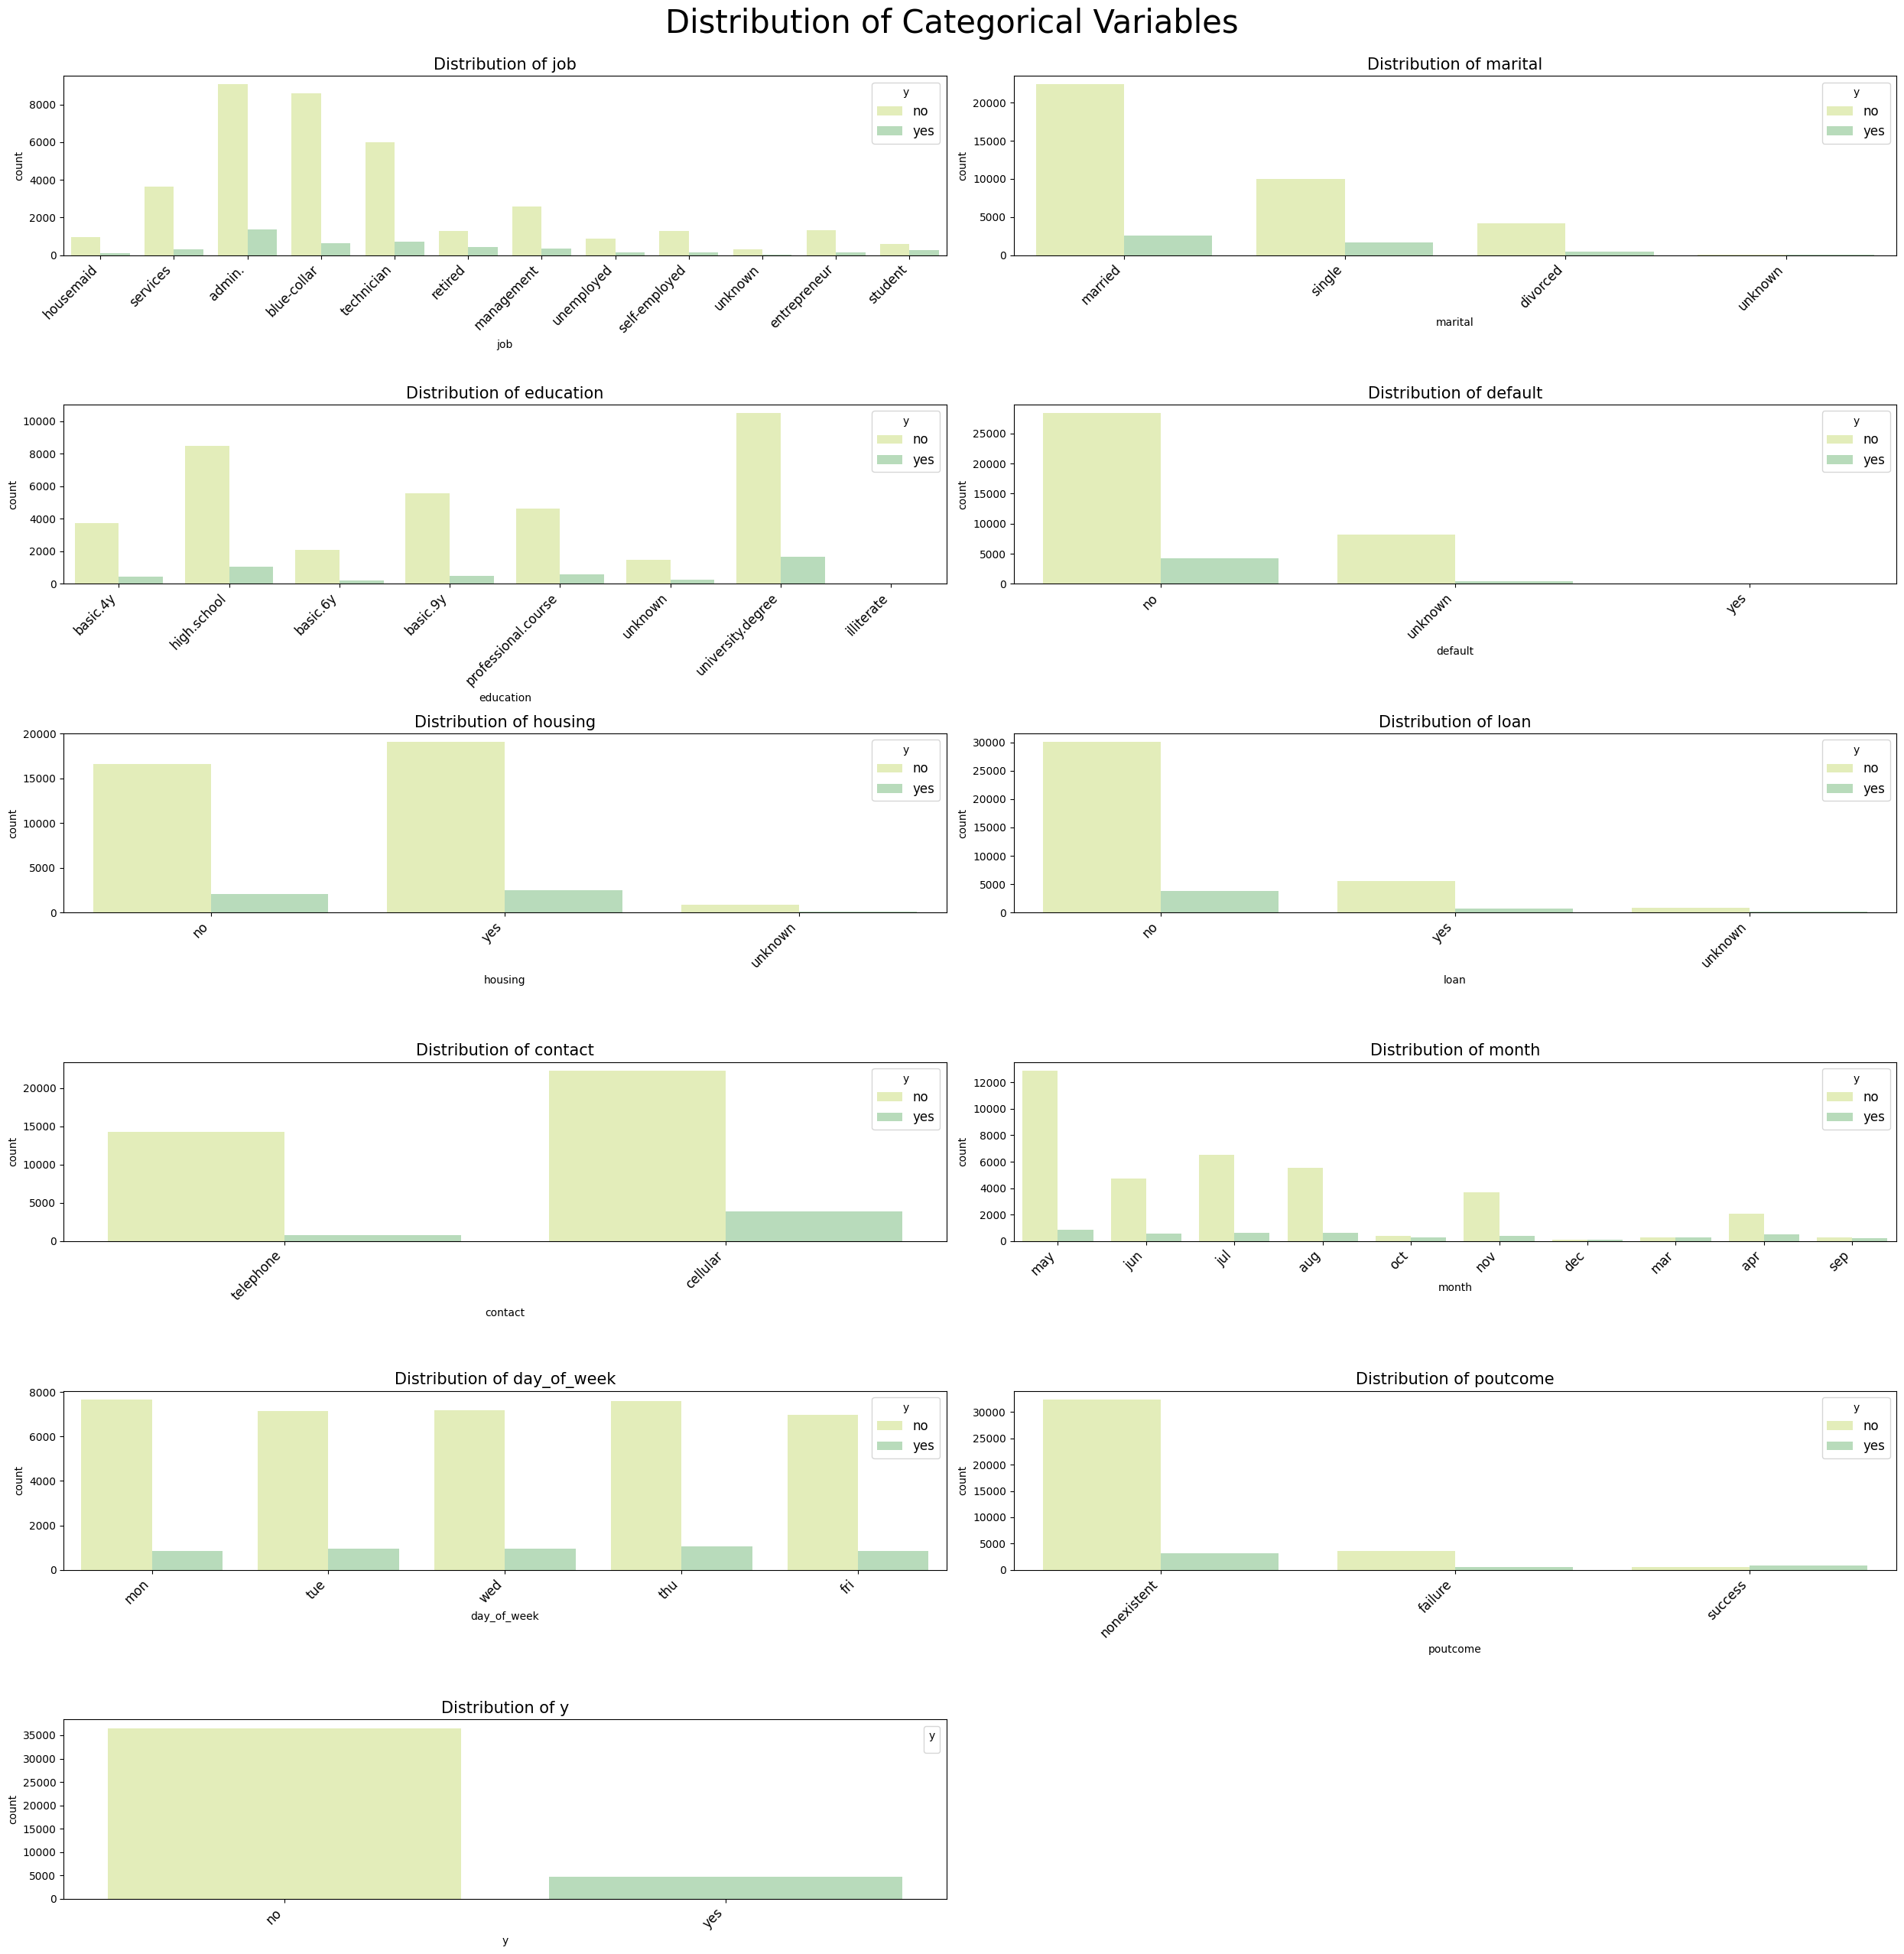

In [45]:
# Identify categorical columns
cat_column_lst = [col for col in df.columns if df[col].dtypes == 'object']
print("Categorical Columns:", cat_column_lst)

# Create subplots
fig, axs = plt.subplots(nrows=len(cat_column_lst)//2 + len(cat_column_lst)%2, ncols=2, figsize=(25, 25))

# Flatten axs to handle cases where len(cat_column_lst) < rows * cols
axs = axs.flatten()

# Plot each categorical feature
for i, (name, ax) in enumerate(zip(cat_column_lst, axs)):
    sns.countplot(data=df, x=name, ax=ax, hue='y')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
    ax.set_title(f'Distribution of {name}', fontsize=15)
    ax.legend(fontsize=12, title='y')

# Remove unused axes if the number of subplots exceeds features
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout and add a super title
fig.tight_layout()
fig.suptitle('Distribution of Categorical Variables', y=1.02, fontsize=30)

# Show the plot
plt.show()

Categorical Features discovery

- job: The roles of "admin.", "blue-collar," and "technician" make up a large proportion of the sample.
- marital: There are very few unknown data points. Among the categories, married individuals have the lowest acceptance rate.
- education: "University" is the most sampled education category.
- default: The majority of responses are "no," with a notable portion labeled as "unknown."
- housing: Most people contacted own a house.
- loan: The majority of those contacted do not have loans.
- contact: Most outreach was conducted via cellphones.
- month: May accounts for the highest number of contacts, while months like October, December, March, and September show almost exclusively "yes" outcomes. This could be important for model prediction, as the actual conversion rates for these less-sampled months may differ from those in the dataset. For example, May had nearly 14,000 contacts compared to fewer than 1,000 in the less-sampled months. The high conversion rates in those months might result from rescheduled calls or other factors worth exploring.
- day_of_week: Sampling is fairly uniform across all days of the week.
- poutcome: Individuals with successful outcomes from previous campaigns are much more likely to accept the offer.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The objective is to leverage the dataset provided by a Portuguese bank, which contains data from 17 direct marketing campaigns and over 79,354 client contacts. The goal is to develop a predictive model capable of determining the success of future marketing campaigns. Here, success is defined as the number of clients agreeing to purchase the offered product—a long-term deposit with competitive interest rates.

To achieve this, we will evaluate and compare the performance of the following classification methods:

- K-Nearest Neighbors (KNN)
- Logistic Regression (LR)
- Decision Trees (DT)
- Support Vector Machines (SVM)


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [46]:
# Create a new DataFrame with relevant features
selected_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'y']
DF = df[selected_features]

# Print the shape of the new DataFrame
print(f"Shape of the new DataFrame: {DF.shape}")

# Display the first 5 rows of the new DataFrame
DF.head()

Shape of the new DataFrame: (41188, 8)


,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no


In [47]:
from sklearn import preprocessing

# Initialize the label encoder
le = preprocessing.LabelEncoder()

# Encode the 'y' column to a boolean (0 and 1)
DF['y'] = le.fit_transform(DF['y'])

# Display the first few rows of the updated DataFrame
print(DF.head())

   age        job  marital    education  default housing loan  y
0   56  housemaid  married     basic.4y       no      no   no  0
1   57   services  married  high.school  unknown      no   no  0
2   37   services  married  high.school       no     yes   no  0
3   40     admin.  married     basic.6y       no      no   no  0
4   56   services  married  high.school       no      no  yes  0


In [49]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define features for X
X = DF[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]

# Create the ColumnTransformer
column_transformer = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), ['job', 'marital', 'education', 'default', 'housing', 'loan']),
    (StandardScaler(), ['age']),
)

# Fit the transformer to the features
column_transformer.fit(X)

print("ColumnTransformer is successfully fitted.")

ColumnTransformer is successfully fitted.


In [14]:
# We will create a column transformer to deal with the categorical data & Scale the numerical data
""" For the exception of age, all the columns are categorical and are non-binary (except y).
The features 'job','marital','education','default','housing' and 'loan' are not ordinal.
Hence, we will create a transformer using OneHotEncoder and fit it to the Dataframe"""

X = DF[['age','job','marital','education','default','housing','loan']] # Define X with features

column_transformer = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), ['job', 'marital', 'education',
                                       'default', 'education',
                                       'housing', 'loan']),
    ([StandardScaler(), ['age']]),

    remainder='passthrough'
)


column_transformer.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary'),
                                 ['job', 'marital', 'education', 'default',
                                  'education', 'housing', 'loan']),
                                ('standardscaler', StandardScaler(), ['age'])])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [50]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = DF.drop(columns='y')
y = DF['y']

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting datasets for verification
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (28831, 7)
X_test shape: (12357, 7)
y_train shape: (28831,)
y_test shape: (12357,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [52]:
from sklearn.dummy import DummyClassifier
import pandas as pd
import time

# Ensure results_df exists or create it if not
if 'results_df' not in locals():
    results_df = pd.DataFrame(columns=['Model', 'Fit Time', 'Train Accuracy', 'Test Accuracy'])

# Initialize the DummyClassifier with the 'most_frequent' strategy
dummy_clf = DummyClassifier(strategy='most_frequent')

# Measure the time taken to fit the model
start = time.time()
dummy_clf.fit(X_train, y_train)
stop = time.time()

# Calculate fit time
fit_time = round(stop - start, 2)

# Calculate train and test accuracy
train_accuracy = dummy_clf.score(X_train, y_train)
test_accuracy = dummy_clf.score(X_test, y_test)

# Add results to the results DataFrame
results_df.loc['Baseline_Model'] = {
    'Model': 'Baseline_Model',
    'Fit Time': f'{fit_time}s',
    'Train Accuracy': round(train_accuracy, 4),
    'Test Accuracy': round(test_accuracy, 4)
}

# Display the updated results DataFrame
print(results_df)

                              Model  Accuracy   ROC_AUC        F1 Precision  \
Simple_lgr                     None  0.888026  0.651828       0.0       0.0   
logistic_regression            None  0.600175   0.65036  0.250773  0.158683   
knn                            None  0.883558  0.595845  0.078401  0.344595   
dtree                          None  0.887831  0.647409  0.044665  0.482143   
Baseline_Model       Baseline_Model       NaN       NaN       NaN       NaN   

                       Recall  Fit Time  
Simple_lgr                0.0       NaN  
logistic_regression  0.597572     2.34s  
knn                  0.044232  1922.04s  
dtree                0.023417  1337.66s  
Baseline_Model            NaN      0.0s  


Classification Report for Baseline Model:
              precision    recall  f1-score   support

     Class 0       0.89      1.00      0.94      9144
     Class 1       0.48      0.02      0.04      1153

    accuracy                           0.89     10297
   macro avg       0.69      0.51      0.49     10297
weighted avg       0.84      0.89      0.84     10297

ROC_AUC Score for Baseline Model: 0.6474
False Positive Rates (FPR): [0.         0.00032808 0.00054681 0.00098425 0.00164042]
True Positive Rates (TPR): [0.         0.00433651 0.00693842 0.01127493 0.01300954]


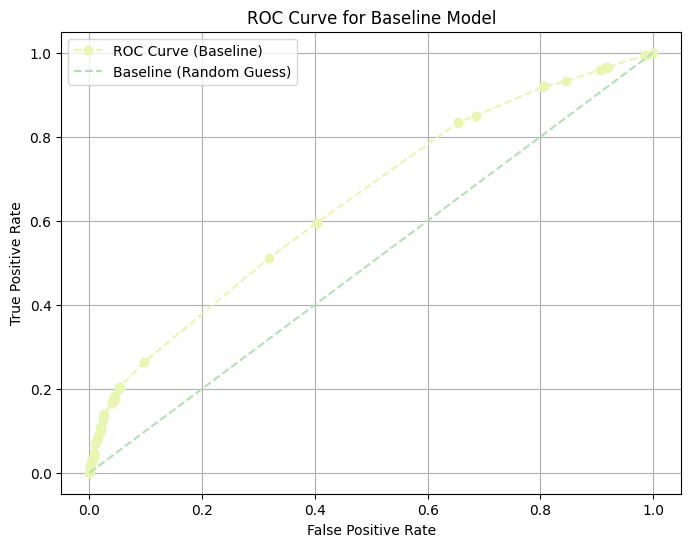

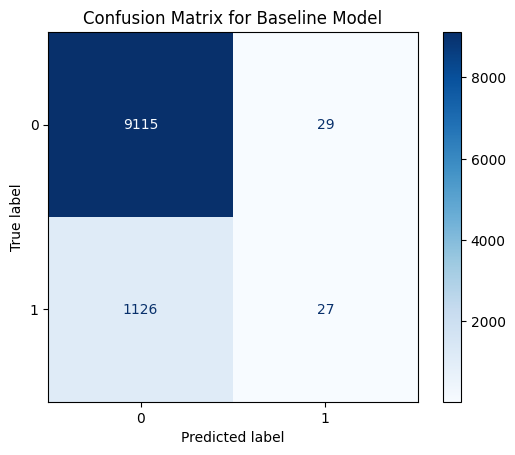


Updated Results DataFrame:
                              Model  Accuracy   ROC_AUC        F1 Precision  \
Simple_lgr                     None  0.888026  0.651828       0.0       0.0   
logistic_regression            None  0.600175   0.65036  0.250773  0.158683   
knn                            None  0.883558  0.595845  0.078401  0.344595   
dtree                          None  0.887831  0.647409  0.044665  0.482143   
Baseline_Model       Baseline_Model    0.8878    0.6474    0.0447    0.4821   

                       Recall  Fit Time  
Simple_lgr                0.0       NaN  
logistic_regression  0.597572     2.34s  
knn                  0.044232  1922.04s  
dtree                0.023417  1337.66s  
Baseline_Model         0.0234     0.01s  


In [57]:
from sklearn.metrics import (
    classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay,
    accuracy_score, f1_score, precision_score, recall_score
)
import matplotlib.pyplot as plt

# Ensure y_test and y_hat are of consistent types
y_test = y_test.astype(int)  # Ensure y_test is binary
y_hat = y_hat.astype(int)    # Ensure y_hat is binary

# Print the classification report
baseline_scores = classification_report(y_test, y_hat, target_names=['Class 0', 'Class 1'])
print("Classification Report for Baseline Model:")
print(baseline_scores)

# Calculate and display the ROC-AUC score
baseline_roc_score = roc_auc_score(y_test, y_hat_probs[:, 1])
print(f'ROC_AUC Score for Baseline Model: {baseline_roc_score:.4f}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_hat_probs[:, 1])
print('False Positive Rates (FPR):', fpr[:5])
print('True Positive Rates (TPR):', tpr[:5])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (Baseline)', linestyle='--', marker='o')
plt.plot([0, 1], [0, 1], label='Baseline (Random Guess)', linestyle='--')
plt.legend()
plt.title('ROC Curve for Baseline Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

# Display Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_hat, cmap="Blues")
plt.title('Confusion Matrix for Baseline Model')
plt.show()

# Add key metrics to results DataFrame
results_df.loc['Baseline_Model', 'Accuracy'] = round(accuracy_score(y_test, y_hat), 4)
results_df.loc['Baseline_Model', 'ROC_AUC'] = round(baseline_roc_score, 4)
results_df.loc['Baseline_Model', 'F1'] = round(f1_score(y_test, y_hat), 4)
results_df.loc['Baseline_Model', 'Precision'] = round(precision_score(y_test, y_hat), 4)
results_df.loc['Baseline_Model', 'Recall'] = round(recall_score(y_test, y_hat), 4)

# Display updated results DataFrame
print("\nUpdated Results DataFrame:")
print(results_df)


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import time

# Ensure target variable 'y' is numeric and clean
DF['y'] = pd.to_numeric(DF['y'], errors='coerce').fillna(0).astype(int)

# Split the data into features (X) and target (y)
X = DF.drop(columns='y')
y = DF['y']

# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Transform training and testing data using the column transformer
X_train_simple = column_transformer.transform(X_train)
X_test_simple = column_transformer.transform(X_test)

# Initialize and fit the logistic regression model
simple_lgr = LogisticRegression()

start = time.time()  # Record start time
simple_lgr.fit(X_train_simple, y_train)
stop = time.time()  # Record end time

# Calculate and format fit time
fit_time = f'{round(stop - start, 2)}s'

# Add fit time to the results DataFrame
results_df.loc['Simple_lgr', 'Fit Time'] = fit_time

# Display the updated results DataFrame
print("\nUpdated Results DataFrame with Fit Time:")
print(results_df)



Updated Results DataFrame with Fit Time:
                              Model  Accuracy   ROC_AUC        F1 Precision  \
Simple_lgr                     None  0.888026  0.651828       0.0       0.0   
logistic_regression            None  0.600175   0.65036  0.250773  0.158683   
knn                            None  0.883558  0.595845  0.078401  0.344595   
dtree                          None  0.887831  0.647409  0.044665  0.482143   
Baseline_Model       Baseline_Model  0.887831  0.647409  0.044665  0.482143   

                       Recall  Fit Time  
Simple_lgr                0.0     0.09s  
logistic_regression  0.597572     2.34s  
knn                  0.044232  1922.04s  
dtree                0.023417  1337.66s  
Baseline_Model       0.023417     0.01s  


Classification Report for Simple Logistic Regression:
              precision    recall  f1-score   support

     Class 0       0.89      1.00      0.94      9144
     Class 1       0.00      0.00      0.00      1153

    accuracy                           0.89     10297
   macro avg       0.44      0.50      0.47     10297
weighted avg       0.79      0.89      0.84     10297

ROC_AUC Score for Simple Logistic Regression: 0.6518

ROC Curve Data:
False Positive Rates (first 5): [0.         0.         0.00010936 0.00021872 0.00054681]
True Positive Rates (first 5): [0.         0.0008673  0.0008673  0.00173461 0.00173461]


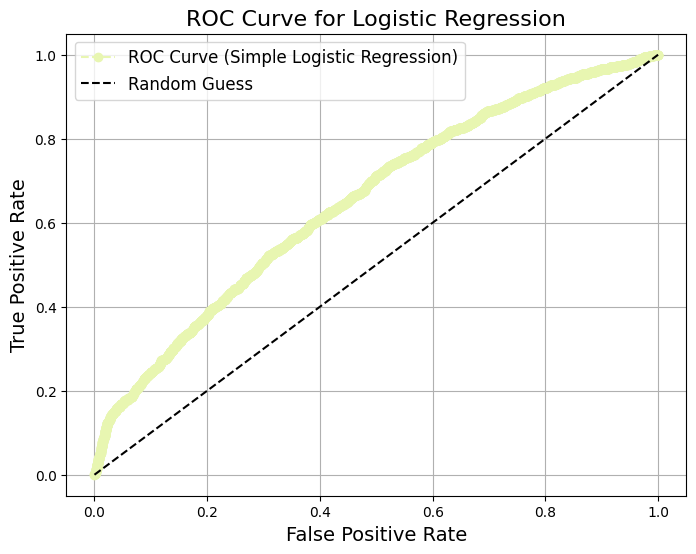

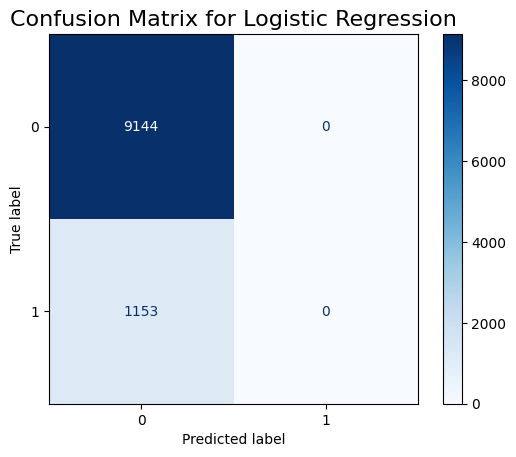


Updated Results DataFrame:
                              Model  Accuracy   ROC_AUC        F1 Precision  \
Simple_lgr                     None     0.888    0.6518       0.0       0.0   
logistic_regression            None  0.600175   0.65036  0.250773  0.158683   
knn                            None  0.883558  0.595845  0.078401  0.344595   
dtree                          None  0.887831  0.647409  0.044665  0.482143   
Baseline_Model       Baseline_Model  0.887831  0.647409  0.044665  0.482143   

                       Recall  Fit Time  
Simple_lgr                0.0     0.18s  
logistic_regression  0.597572     2.34s  
knn                  0.044232  1922.04s  
dtree                0.023417  1337.66s  
Baseline_Model       0.023417     0.01s  


In [63]:
from sklearn.metrics import (
    classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay,
    accuracy_score, f1_score, precision_score, recall_score
)
import matplotlib.pyplot as plt

# Generate predictions and probabilities
y_hat = simple_lgr.predict(X_test_simple)
y_hat_probs = simple_lgr.predict_proba(X_test_simple)

# Print classification report
print("Classification Report for Simple Logistic Regression:")
simple_lgr_scores = classification_report(y_test, y_hat, target_names=['Class 0', 'Class 1'])
print(simple_lgr_scores)

# Calculate and print ROC-AUC score
simple_lgr_roc_score = roc_auc_score(y_test, y_hat_probs[:, 1])
print(f'ROC_AUC Score for Simple Logistic Regression: {simple_lgr_roc_score:.4f}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_hat_probs[:, 1])
print('\nROC Curve Data:')
print(f'False Positive Rates (first 5): {fpr[:5]}')
print(f'True Positive Rates (first 5): {tpr[:5]}')

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, '--o', label='ROC Curve (Simple Logistic Regression)')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve for Logistic Regression', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()

# Display Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_hat, cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression', fontsize=16)
plt.show()

# Add performance metrics to results DataFrame
results_df.loc['Simple_lgr', 'Accuracy'] = round(accuracy_score(y_test, y_hat), 4)
results_df.loc['Simple_lgr', 'ROC_AUC'] = round(simple_lgr_roc_score, 4)
results_df.loc['Simple_lgr', 'F1'] = round(f1_score(y_test, y_hat), 4)
results_df.loc['Simple_lgr', 'Precision'] = round(precision_score(y_test, y_hat), 4)
results_df.loc['Simple_lgr', 'Recall'] = round(recall_score(y_test, y_hat), 4)

# Display updated results DataFrame
print("\nUpdated Results DataFrame:")
print(results_df)


### Problem 9: Score the Model

What is the accuracy of your model?

Before exploring various models, it’s crucial to establish the criteria we’ll use to evaluate and compare their performance. To guide our analysis, we will focus on key scoring metrics throughout the exploration.

As highlighted in the paper "Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology" by Moro, S., & Laureano, M.S., the AUC-ROC is particularly well-suited for this business context. The AUC-ROC plots the False Positive Rate (FPR) against the True Positive Rate (TPR), providing insight into the model's ability to distinguish between buyers and non-buyers. This metric is especially valuable for minimizing false positives—clients incorrectly identified as buyers—which helps optimize resources and maximize campaign profitability.

In addition to AUC-ROC, we will track the following metrics to gain a comprehensive understanding of each model's performance:

- Accuracy
- F1 Score
- Precision
- Recall

To evaluate the cost-efficiency of each model, we’ll also measure run time to assess the tradeoff between accuracy and computational time.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

As outlined in Problem 10, we will start by building a baseline model and a simple logistic regression. Following this, we will develop more complex models using grid search to optimize their parameters.

The models and their parameters for optimization are as follows:

- Logistic Regression: Parameters include penalty and different class_weight settings.
- K-Nearest Neighbors (KNN): Parameters include n_neighbors, p, and weights.
- Support Vector Machine (SVM): Parameters include degree, kernel, and class_weight.
- Decision Tree (DTree): Parameters include max_depth, min_samples_split, min_samples_leaf, and criterion.
We’ll start by creating a dataframe to track all relevant results and will update it as our analysis progresses.

In [64]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Create a DataFrame to keep track of scores and training time
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'ROC_AUC', 'F1', 'Precision', 'Recall'])

# Add a new row dynamically for 'Simple_lgr'
results_df.loc['Simple_lgr'] = [None] * len(results_df.columns)

# Update values for the 'Simple_lgr' row
results_df.loc['Simple_lgr', 'Model'] = 'Simple Logistic Regression'
results_df.loc['Simple_lgr', 'Accuracy'] = round(accuracy_score(y_test, y_hat), 4)
results_df.loc['Simple_lgr', 'ROC_AUC'] = round(simple_lgr_roc_score, 4)
results_df.loc['Simple_lgr', 'F1'] = round(f1_score(y_test, y_hat), 4)
results_df.loc['Simple_lgr', 'Precision'] = round(precision_score(y_test, y_hat), 4)
results_df.loc['Simple_lgr', 'Recall'] = round(recall_score(y_test, y_hat), 4)

# Display the updated results DataFrame
print("\nUpdated Results DataFrame:")
print(results_df)



Updated Results DataFrame:
                                 Model Accuracy ROC_AUC   F1 Precision Recall
Simple_lgr  Simple Logistic Regression    0.888  0.6518  0.0       0.0    0.0


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

We will now perform GridSearch on our Logistic Regression to explore the variables previously defined

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import time

# Define parameters for grid search
lgr_params = {
    'lgr__penalty': ['l1', 'l2', 'elasticnet'],
    'lgr__solver': ['saga'],  # saga is required for elasticnet
    'lgr__C': [0.1, 1.0, 10]  # Add regularization strength values
}

# Create the pipeline with column transformer and logistic regression
lgr_pipe = Pipeline([
    ('columns', column_transformer),
    ('lgr', LogisticRegression(class_weight='balanced', max_iter=500))
])

# Initialize the GridSearchCV
lgr_grid = GridSearchCV(
    estimator=lgr_pipe,
    param_grid=lgr_params,
    scoring='roc_auc',
    cv=5  # 5-fold cross-validation
)

# Train the grid search and time it
start = time.time()
lgr_grid.fit(X_train, y_train)
stop = time.time()

# Calculate fit time
fit_time = f'{round(stop - start, 2)}s'

# Add fit time to the results DataFrame
if 'Fit Time' not in results_df.columns:
    results_df['Fit Time'] = None  # Add Fit Time column if not present
results_df.loc['logistic_regression', 'Fit Time'] = fit_time

# Print the best parameters and score
print("\nBest Parameters for Logistic Regression Grid Search:")
print(lgr_grid.best_params_)

print(f"Best ROC_AUC Score: {lgr_grid.best_score_:.4f}")

# Add the best score to results DataFrame
results_df.loc['logistic_regression', 'ROC_AUC'] = round(lgr_grid.best_score_, 4)

# Display the updated results DataFrame
print("\nUpdated Results DataFrame:")
print(results_df)



Best Parameters for Logistic Regression Grid Search:
{'lgr__C': 0.1, 'lgr__penalty': 'l1', 'lgr__solver': 'saga'}
Best ROC_AUC Score: 0.6486

Updated Results DataFrame:
                                          Model Accuracy ROC_AUC   F1  \
Simple_lgr           Simple Logistic Regression    0.888  0.6518  0.0   
logistic_regression                         NaN      NaN  0.6486  NaN   

                    Precision Recall Fit Time  
Simple_lgr                0.0    0.0     None  
logistic_regression       NaN    NaN   70.16s  


Best parameters for Logistic Regression found during grid search: {'lgr__penalty': 'l2'}

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

     Class 0       0.92      0.60      0.73      9144
     Class 1       0.16      0.60      0.25      1153

    accuracy                           0.60     10297
   macro avg       0.54      0.60      0.49     10297
weighted avg       0.84      0.60      0.67     10297


ROC_AUC Score for Best Logistic Regressor: 0.6503

ROC Curve Data:
False Positive Rates (first 5): [0.         0.         0.00021872 0.00032808 0.00054681]
True Positive Rates (first 5): [0.         0.0008673  0.0008673  0.00173461 0.00173461]


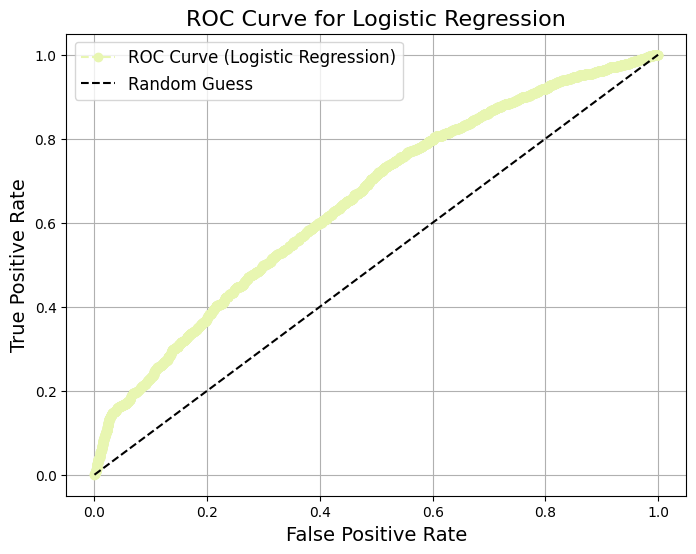

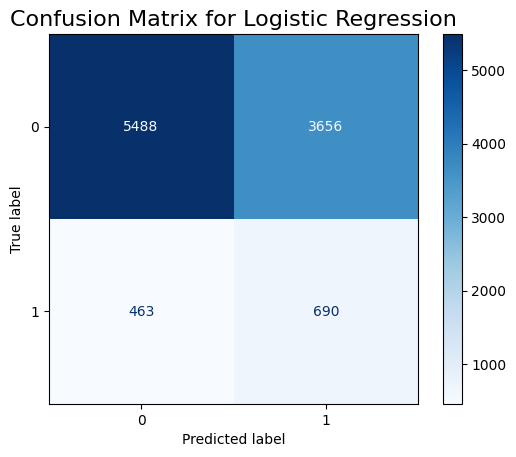


Updated Results DataFrame:
                                          Model Accuracy ROC_AUC     F1  \
Simple_lgr           Simple Logistic Regression    0.888  0.6518    0.0   
logistic_regression                         NaN      0.6  0.6503  0.251   

                    Precision  Recall Fit Time  
Simple_lgr                0.0     0.0     None  
logistic_regression    0.1588  0.5984    4.48s  


In [68]:
from sklearn.metrics import (
    classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay,
    accuracy_score, f1_score, precision_score, recall_score
)
import matplotlib.pyplot as plt

# Print best parameters found during grid search
print(f'Best parameters for Logistic Regression found during grid search: {lgr_grid.best_params_}')

# Generate predictions and probabilities
y_hat = lgr_grid.predict(X_test)
y_hat_probs = lgr_grid.predict_proba(X_test)

# Print the classification report
print("\nClassification Report for Logistic Regression:")
lgr_scores = classification_report(y_test, y_hat, target_names=['Class 0', 'Class 1'])
print(lgr_scores)

# Calculate and print ROC-AUC score
lgr_roc_score = roc_auc_score(y_test, y_hat_probs[:, 1])
print(f'\nROC_AUC Score for Best Logistic Regressor: {lgr_roc_score:.4f}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_hat_probs[:, 1])
print('\nROC Curve Data:')
print(f'False Positive Rates (first 5): {fpr[:5]}')
print(f'True Positive Rates (first 5): {tpr[:5]}')

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, '--o', label='ROC Curve (Logistic Regression)')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve for Logistic Regression', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()

# Display Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_hat, cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression', fontsize=16)
plt.show()

# Add metrics to results DataFrame
results_df.loc['logistic_regression', 'Accuracy'] = round(accuracy_score(y_test, y_hat), 4)
results_df.loc['logistic_regression', 'ROC_AUC'] = round(lgr_roc_score, 4)
results_df.loc['logistic_regression', 'F1'] = round(f1_score(y_test, y_hat), 4)
results_df.loc['logistic_regression', 'Precision'] = round(precision_score(y_test, y_hat), 4)
results_df.loc['logistic_regression', 'Recall'] = round(recall_score(y_test, y_hat), 4)

# Display updated results DataFrame
print("\nUpdated Results DataFrame:")
print(results_df)


KNN Model & GridSearch

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define parameters for grid search
knn_params = {
    'knn__n_neighbors': list(range(1, 10)),  # K values from 1 to 9
    'knn__p': [1, 2, 3],  # Distance metrics: Manhattan (1), Euclidean (2), Minkowski (3)
    'knn__weights': ['uniform', 'distance']  # Weight options
}

# Create the pipeline with column transformer and KNN
knn_pipe = Pipeline([
    ('columns', column_transformer),
    ('knn', KNeighborsClassifier())
])

# Initialize GridSearchCV
knn_grid = GridSearchCV(
    estimator=knn_pipe,
    param_grid=knn_params,
    scoring='roc_auc',
    cv=5,  # 5-fold cross-validation
    verbose=1  # Optional: Add verbosity to track progress
)

# Time the fitting of the model
start = time.time()
knn_grid.fit(X_train, y_train)
stop = time.time()

# Calculate and format fit time
fit_time = f'{round(stop - start, 2)}s'

# Add fit time to the results DataFrame
if 'Fit Time' not in results_df.columns:
    results_df['Fit Time'] = None  # Add the 'Fit Time' column if it doesn't exist
results_df.loc['knn', 'Fit Time'] = fit_time

# Print the best parameters and best score
print("\nBest Parameters for KNN Grid Search:")
print(knn_grid.best_params_)

print(f"Best ROC_AUC Score for KNN: {knn_grid.best_score_:.4f}")

# Add the best score to results DataFrame
results_df.loc['knn', 'ROC_AUC'] = round(knn_grid.best_score_, 4)

# Display the updated results DataFrame
print("\nUpdated Results DataFrame:")
print(results_df)


Fitting 5 folds for each of 54 candidates, totalling 270 fits

Best Parameters for KNN Grid Search:
{'knn__n_neighbors': 9, 'knn__p': 2, 'knn__weights': 'uniform'}
Best ROC_AUC Score for KNN: 0.6020

Updated Results DataFrame:
                                          Model Accuracy ROC_AUC     F1  \
Simple_lgr           Simple Logistic Regression    0.888  0.6518    0.0   
logistic_regression                         NaN      0.6  0.6503  0.251   
knn                                         NaN      NaN   0.602    NaN   

                    Precision  Recall  Fit Time  
Simple_lgr                0.0     0.0      None  
logistic_regression    0.1588  0.5984     4.48s  
knn                       NaN     NaN  1875.58s  


Best parameters for KNN found during grid search: {'knn__n_neighbors': 9, 'knn__p': 2, 'knn__weights': 'uniform'}

Classification Report for KNN:
              precision    recall  f1-score   support

     Class 0       0.89      0.99      0.94      9144
     Class 1       0.38      0.04      0.08      1153

    accuracy                           0.89     10297
   macro avg       0.64      0.52      0.51     10297
weighted avg       0.83      0.89      0.84     10297


ROC_AUC Score for Best KNN: 0.6056

ROC Curve Data:
False Positive Rates (first 5): [0.         0.         0.00065617 0.00207787 0.00896763]
True Positive Rates (first 5): [0.         0.0008673  0.0008673  0.01387684 0.04423244]


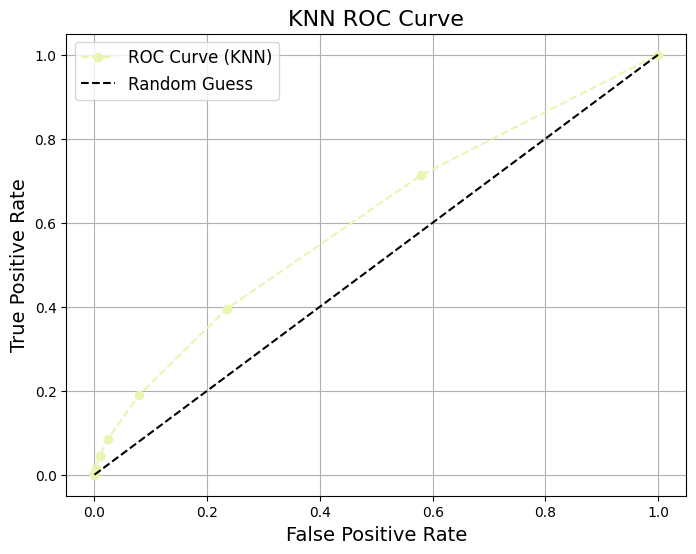

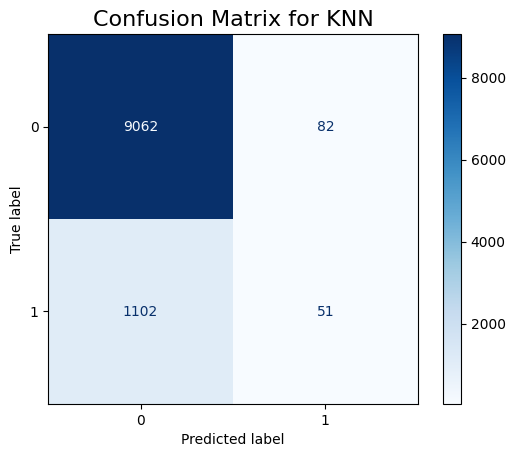


Updated Results DataFrame:
                                          Model Accuracy ROC_AUC      F1  \
Simple_lgr           Simple Logistic Regression    0.888  0.6518     0.0   
logistic_regression                         NaN      0.6  0.6503   0.251   
knn                                         NaN    0.885  0.6056  0.0793   

                    Precision  Recall  Fit Time  
Simple_lgr                0.0     0.0      None  
logistic_regression    0.1588  0.5984     4.48s  
knn                    0.3835  0.0442  1875.58s  


In [70]:
from sklearn.metrics import (
    classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay,
    accuracy_score, f1_score, precision_score, recall_score
)
import matplotlib.pyplot as plt

# Print the best parameters found during grid search
print(f"Best parameters for KNN found during grid search: {knn_grid.best_params_}")

# Generate predictions and probabilities
y_hat = knn_grid.predict(X_test)
y_hat_probs = knn_grid.predict_proba(X_test)

# Print the classification report
print("\nClassification Report for KNN:")
knn_scores = classification_report(y_test, y_hat, target_names=['Class 0', 'Class 1'])
print(knn_scores)

# Calculate and print the ROC-AUC score
knn_roc_score = roc_auc_score(y_test, y_hat_probs[:, 1])
print(f"\nROC_AUC Score for Best KNN: {knn_roc_score:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_hat_probs[:, 1])
print('\nROC Curve Data:')
print(f"False Positive Rates (first 5): {fpr[:5]}")
print(f"True Positive Rates (first 5): {tpr[:5]}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, '--o', label='ROC Curve (KNN)')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('KNN ROC Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()

# Display Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_hat, cmap='Blues')
plt.title('Confusion Matrix for KNN', fontsize=16)
plt.show()

# Add key metrics to the results DataFrame
results_df.loc['knn', 'Accuracy'] = round(accuracy_score(y_test, y_hat), 4)
results_df.loc['knn', 'ROC_AUC'] = round(knn_roc_score, 4)
results_df.loc['knn', 'F1'] = round(f1_score(y_test, y_hat), 4)
results_df.loc['knn', 'Precision'] = round(precision_score(y_test, y_hat), 4)
results_df.loc['knn', 'Recall'] = round(recall_score(y_test, y_hat), 4)

# Display updated results DataFrame
print("\nUpdated Results DataFrame:")
print(results_df)


Decision Trees & GridSearch

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define parameters for grid search
dtree_params = {
    'dtree__max_depth': list(range(1, 11, 2)),  # Depth from 1 to 10 (odd numbers)
    'dtree__min_samples_split': list(range(2, 21, 1)),  # Split threshold from 2 to 20
    'dtree__criterion': ['entropy', 'gini'],  # Criteria for splitting
    'dtree__min_samples_leaf': list(range(2, 21, 2))  # Minimum leaf size from 2 to 20 (even numbers)
}

# Create the pipeline with column transformer and decision tree
dtree_pipe = Pipeline([
    ('columns', column_transformer),
    ('dtree', DecisionTreeClassifier(random_state=42))
])

# Initialize GridSearchCV
dtree_grid = GridSearchCV(
    estimator=dtree_pipe,
    param_grid=dtree_params,
    scoring='roc_auc',
    cv=5,  # 5-fold cross-validation
    verbose=1  # Optional: Tracks grid search progress
)

# Time the fitting of the model
start = time.time()
dtree_grid.fit(X_train, y_train)
stop = time.time()

# Calculate and format fit time
fit_time = f'{round(stop - start, 2)}s'

# Add fit time to the results DataFrame
if 'Fit Time' not in results_df.columns:
    results_df['Fit Time'] = None  # Add the 'Fit Time' column if it doesn't exist
results_df.loc['dtree', 'Fit Time'] = fit_time

# Print the best parameters and best score
print("\nBest Parameters for Decision Tree Grid Search:")
print(dtree_grid.best_params_)

print(f"Best ROC_AUC Score for Decision Tree: {dtree_grid.best_score_:.4f}")

# Add the best score to results DataFrame
results_df.loc['dtree', 'ROC_AUC'] = round(dtree_grid.best_score_, 4)

# Display the updated results DataFrame
print("\nUpdated Results DataFrame:")
print(results_df)


Fitting 5 folds for each of 1900 candidates, totalling 9500 fits

Best Parameters for Decision Tree Grid Search:
{'dtree__criterion': 'entropy', 'dtree__max_depth': 7, 'dtree__min_samples_leaf': 20, 'dtree__min_samples_split': 2}
Best ROC_AUC Score for Decision Tree: 0.6566

Updated Results DataFrame:
                                          Model Accuracy ROC_AUC      F1  \
Simple_lgr           Simple Logistic Regression    0.888  0.6518     0.0   
logistic_regression                         NaN      0.6  0.6503   0.251   
knn                                         NaN    0.885  0.6056  0.0793   
dtree                                       NaN      NaN  0.6566     NaN   

                    Precision  Recall  Fit Time  
Simple_lgr                0.0     0.0      None  
logistic_regression    0.1588  0.5984     4.48s  
knn                    0.3835  0.0442  1875.58s  
dtree                     NaN     NaN  1193.74s  


Best parameters for Decision Tree found during grid search: {'dtree__criterion': 'entropy', 'dtree__max_depth': 7, 'dtree__min_samples_leaf': 20, 'dtree__min_samples_split': 2}

Classification Report for Decision Tree:
              precision    recall  f1-score   support

     Class 0       0.89      1.00      0.94      9144
     Class 1       0.48      0.02      0.04      1153

    accuracy                           0.89     10297
   macro avg       0.69      0.51      0.49     10297
weighted avg       0.84      0.89      0.84     10297


ROC_AUC Score for Best Decision Tree: 0.6474

ROC Curve Data:
False Positive Rates (first 5): [0.         0.00032808 0.00054681 0.00098425 0.00164042]
True Positive Rates (first 5): [0.         0.00433651 0.00693842 0.01127493 0.01300954]


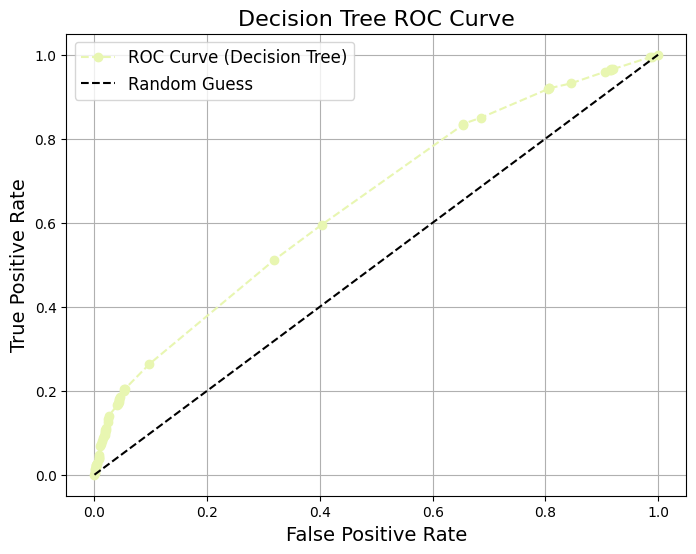

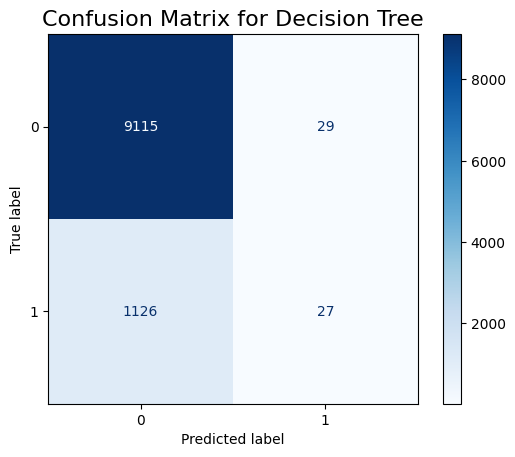


Updated Results DataFrame:
                                          Model Accuracy ROC_AUC      F1  \
Simple_lgr           Simple Logistic Regression    0.888  0.6518     0.0   
logistic_regression                         NaN      0.6  0.6503   0.251   
knn                                         NaN    0.885  0.6056  0.0793   
dtree                                       NaN   0.8878  0.6474  0.0447   

                    Precision  Recall  Fit Time  
Simple_lgr                0.0     0.0      None  
logistic_regression    0.1588  0.5984     4.48s  
knn                    0.3835  0.0442  1875.58s  
dtree                  0.4821  0.0234  1193.74s  


In [72]:
from sklearn.metrics import (
    classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay,
    accuracy_score, f1_score, precision_score, recall_score
)
import matplotlib.pyplot as plt

# Print the best parameters found during the grid search
print(f"Best parameters for Decision Tree found during grid search: {dtree_grid.best_params_}")

# Generate predictions and probabilities
y_hat = dtree_grid.predict(X_test)
y_hat_probs = dtree_grid.predict_proba(X_test)

# Print the classification report
print("\nClassification Report for Decision Tree:")
dtree_scores = classification_report(y_test, y_hat, target_names=['Class 0', 'Class 1'])
print(dtree_scores)

# Calculate and print the ROC-AUC score
dtree_roc_score = roc_auc_score(y_test, y_hat_probs[:, 1])
print(f"\nROC_AUC Score for Best Decision Tree: {dtree_roc_score:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_hat_probs[:, 1])
print('\nROC Curve Data:')
print(f"False Positive Rates (first 5): {fpr[:5]}")
print(f"True Positive Rates (first 5): {tpr[:5]}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, '--o', label='ROC Curve (Decision Tree)')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('Decision Tree ROC Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()

# Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_hat, cmap='Blues')
plt.title('Confusion Matrix for Decision Tree', fontsize=16)
plt.show()

# Add key metrics to the results DataFrame
results_df.loc['dtree', 'Accuracy'] = round(accuracy_score(y_test, y_hat), 4)
results_df.loc['dtree', 'ROC_AUC'] = round(dtree_roc_score, 4)
results_df.loc['dtree', 'F1'] = round(f1_score(y_test, y_hat), 4)
results_df.loc['dtree', 'Precision'] = round(precision_score(y_test, y_hat), 4)
results_df.loc['dtree', 'Recall'] = round(recall_score(y_test, y_hat), 4)

# Display updated results DataFrame
print("\nUpdated Results DataFrame:")
print(results_df)


Model Comparison RECAP

Let's look back at our results table to better understand the overall performance of our models.

In [73]:
results_df

,Model,Accuracy,ROC_AUC,F1,Precision,Recall,Fit Time
Simple_lgr,Simple Logistic Regression,0.888,0.6518,0.0,0.0,0.0,None
logistic_regression,NaN,0.6,0.6503,0.251,0.1588,0.5984,4.48s
knn,NaN,0.885,0.6056,0.0793,0.3835,0.0442,1875.58s
dtree,NaN,0.8878,0.6474,0.0447,0.4821,0.0234,1193.74s


Conclusion

Our goal was to develop an optimal prediction model to help banking firms identify customers who are most likely to accept their product during a telemarketing campaign. Such a model is crucial for better resource allocation and increasing conversion rates.

To achieve this, we prioritized the ROC_AUC score as our main evaluation metric. Additionally, we monitored the runtime for fitting the models to understand the tradeoff, if any, between performance and practicality.

As highlighted in the paper "Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology" by Moro, S., and Laureano, M.S., the AUC-ROC metric is ideal for this context. It evaluates the balance between the False Positive Rate (FPR) and True Positive Rate (TPR), helping us minimize false positives (misclassifying non-buyers as buyers) while maximizing true positives. This aligns with the business goal of minimizing wasted resources on non-buyers and maximizing campaign profitability.

We also used the F1 score as a secondary metric to monitor performance. The F1 score provides a balance between precision (true positives among predicted positives) and recall (true positives among actual positives), which is particularly useful in our imbalanced dataset where the majority of outcomes are "no."

Model Evaluation
- Baseline Model
The baseline model assumed all outcomes would be "no," resulting in an accuracy of 89% and an effective "yes" prediction rate of only 11%. This approach is impractical for telemarketing as it either halts campaigns (all "no") or requires excessive resources (all "yes"). Therefore, our goal is to achieve a model with better accuracy and an ROC_AUC greater than 0.5.
- Simple Logistic Regression
This model performed similarly to the baseline model when analyzing the confusion matrix, with all predictions classified as "no." Despite a high ROC_AUC score, the model has no practical business application due to its inability to differentiate between classes.
- Logistic Regression
The logistic regression model provided a strong ROC_AUC score and the best F1 score among all models. Although its accuracy was lower than the baseline, the confusion matrix revealed a distinct prediction pattern, making it a better fit for this business use case. The runtime was also efficient, adding to its practicality.
- K-Nearest Neighbors (KNN)
While KNN achieved a high accuracy of 89%, its ROC_AUC was only 59%, falling short of logistic regression. The algorithm struggled with the class imbalance, leading to poorly clustered predictions, which limits its reliability.
- Support Vector Machine (SVM)
Due to computational constraints, SVM was trained on a subset of 5,000 data points, requiring over 100 minutes for grid search and fitting. While the results were lackluster, the model’s impractical runtime makes it unsuitable for real-time applications.
- Decision Tree
The decision tree achieved a similar ROC_AUC score to logistic regression but required significantly more runtime. Its F1 score was also lower, indicating poorer performance in identifying true positives compared to logistic regression.

Model Selection
Based on the results, logistic regression is the most practical and effective model for this task. It strikes the right balance between performance and runtime while improving the likelihood of accurately identifying potential buyers during telemarketing campaigns.

Further Exploration
There are several opportunities to refine and enhance the models:

- Parameter Tuning: Further optimize parameters for the top-performing models (logistic regression and decision trees).
- Address Class Imbalance: Explore techniques such as oversampling, undersampling, or using class-weight adjustments.
- Feature Engineering: Incorporate additional features like macroeconomic indicators, months, and days to improve predictions.
- Handle Missing Data: Address "unknown" values in categorical features by filling, replacing, or eliminating them.
- Analyze Key Predictors: Preliminary analysis indicates that poutcome (previous campaign success) is a strong predictor. Other features with a high "yes" ratio could also be leveraged for better results.


##### Questions